# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [30]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import sklearn   
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Importing the dataset

In [31]:
data = pd.read_csv("data.csv")
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,NaN
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [32]:
data.shape

(614, 12)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        613 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [34]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           1
dtype: int64

In [35]:
#Drop rows where o/p label 'Loan_Status' has missing values
data.dropna(axis=0, how='any', subset=['Loan_Status'], inplace=True)
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
data.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MaxAbsScaler

# Handling missing values
categorical_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']
numerical_columns = ['LoanAmount']

# Fill missing values in categorical columns with mode
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Fill missing values in numerical columns with mean
for col in numerical_columns:
    data[col].fillna(data[col].mean(), inplace=True)

# Encode categorical variables
encoder = LabelEncoder()
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

# Normalize numerical features
scaler =  MaxAbsScaler()
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.000000,0.0,0.0,0.072210,0.000000,0.209355,0.888889,1.0,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.056580,0.036192,0.182857,0.888889,1.0,0.0,0.0
3,1.0,1.0,0.000000,1.0,0.0,0.031889,0.056592,0.171429,0.888889,1.0,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.074074,0.000000,0.201429,0.888889,1.0,1.0,1.0
5,1.0,1.0,0.666667,0.0,1.0,0.066877,0.100703,0.381429,0.888889,1.0,1.0,1.0


In [38]:
# Assuming the last column contains your target labels (0 or 1)
X = data.iloc[:, :-1]  # Features (all columns except the last)
y = data.iloc[:, -1]   # Target labels (last column)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=54, shuffle=False)

In [39]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.000000,0.0,0.0,0.072210,0.000000,0.209355,0.888889,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.056580,0.036192,0.182857,0.888889,1.0,0.0
3,1.0,1.0,0.000000,1.0,0.0,0.031889,0.056592,0.171429,0.888889,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.074074,0.000000,0.201429,0.888889,1.0,1.0
5,1.0,1.0,0.666667,0.0,1.0,0.066877,0.100703,0.381429,0.888889,1.0,1.0


In [40]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
552,1.0,1.0,0.333333,0.0,0.0,0.041148,0.077999,0.225714,0.888889,1.0,1.0
553,1.0,1.0,0.000000,1.0,0.0,0.030296,0.055992,0.258571,0.888889,0.0,1.0
554,1.0,1.0,0.000000,0.0,0.0,0.044358,0.102383,0.188571,0.555556,0.0,0.0
555,1.0,1.0,0.333333,0.0,0.0,0.067506,0.024768,0.037143,0.888889,1.0,0.5
556,0.0,0.0,0.000000,0.0,0.0,0.032926,0.039000,0.120000,0.888889,1.0,1.0


In [41]:
y_train.head()

0    1.0
1    0.0
3    1.0
4    1.0
5    1.0
Name: Loan_Status, dtype: float64

In [42]:
y_test.head()

552    1.0
553    0.0
554    0.0
555    1.0
556    1.0
Name: Loan_Status, dtype: float64

In [43]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)#The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [44]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 2,
 'weights': 'uniform'}

In [45]:
y_pred = model.predict(X_test)

In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Macro Precision score: ", precision)
print("Macro Recall score: ", recall)
print("Macro F1 score: ", f1)

Macro Precision score:  0.7959183673469388
Macro Recall score:  0.9512195121951219
Macro F1 score:  0.8666666666666666


In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11 10]
 [ 2 39]]


0.8064516129032258

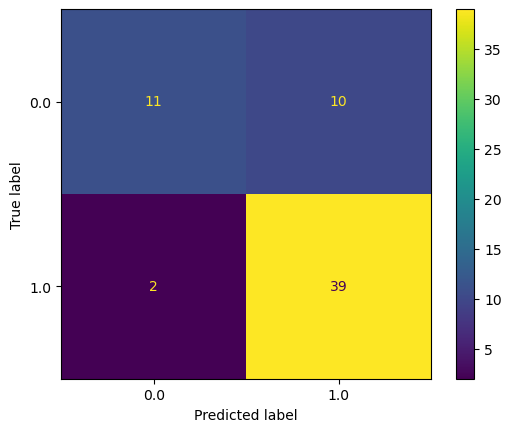

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

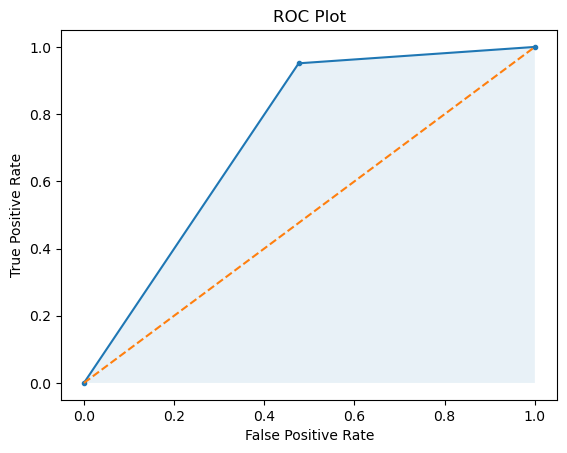

In [49]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], '--')
plt.fill_between(fpr, tpr, 0, alpha=0.1)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

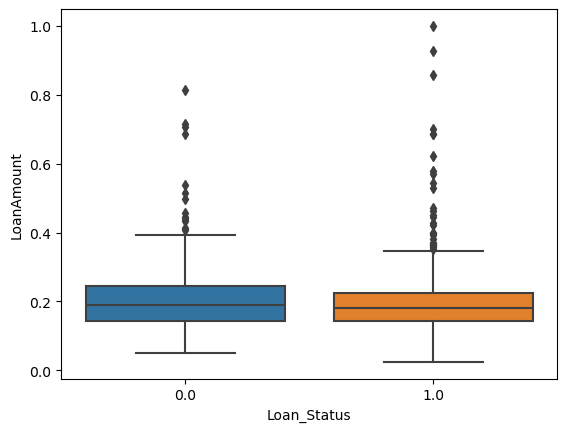

In [50]:
# # Drawing plots one by one 
def num_box_plot(df, x, y):     
    return sns.boxplot(data=df, x=x, y=y)

num_col = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
outut_col = 'Loan_Status'

num_box_plot(X_train, y_train, num_col[2])

In [51]:
# Remove rows where CoapplicantIncome is greater than 12500
# Apply multiple conditions in one step
data_filtered = data[(data['CoapplicantIncome'] <= 0.25) & 
                     (data['ApplicantIncome'] <= 0.5) & 
                     (data['LoanAmount'] <= 0.7)]

data = data_filtered.copy()

data.shape

(598, 12)

In [52]:
# Assuming the last column contains your target labels (0 or 1)
X = data.iloc[:, :-1]  # Features (all columns except the last)
y = data.iloc[:, -1]   # Target labels (last column)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=54, shuffle=False)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)#The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [54]:
y_pred = model.predict(X_test)

In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Macro Precision score: ", precision)
print("Macro Recall score: ", recall)
print("Macro F1 score: ", f1)

Macro Precision score:  0.8260869565217391
Macro Recall score:  0.95
Macro F1 score:  0.8837209302325583


In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[12  8]
 [ 2 38]]


0.8333333333333334

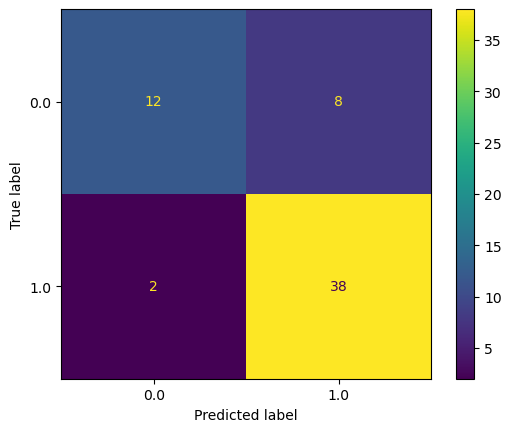

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

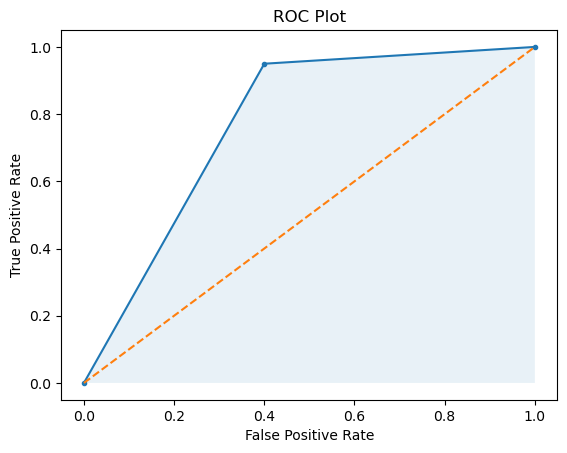

In [58]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], '--')
plt.fill_between(fpr, tpr, 0, alpha=0.1)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Splitting the dataset into the Training set and Test set

## Feature Scaling

## Training the K-NN model on the Training set

## Predicting the Test set results

## Making the Confusion Matrix to compare both models

## Visualising the Test set results 